# Market Campaign Project


#### Data Inspection

In [1]:
import pandas as pd 
import numpy as np 
# Importing the marketing dataset 
data=pd.read_csv('marketing_data.csv')
# Creating a DataFrame
df=pd.DataFrame(data)
# Inspecting the dataset
print(df.head())
print(df.tail())
print(df.info())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

#### Data Cleaning 


In [2]:
# Converting the Dt_Customer to Datetime Object
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
# Renaming the Income column to Income without space
df.rename(columns={' Income ': 'Income'}, inplace=True)
# Clean 'Income' column
df['Income'] = df['Income'].str.replace(r'[$,]', '', regex=True).astype(float)
df['Income'].fillna(df['Income'].median(), inplace=True)
# Cleaning the Education and Martial Status Columns
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Graduation', 
    'Basic': 'Basic',
    'Graduation': 'Graduation',
    'Master': 'Master',
    'PhD': 'PhD'
})
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Widow': 'Single'  
})
# Creating a variables to represent the total number of children, age, and total spending
df[['Kidhome','Teenhome']].value_counts()
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Age']=2025-df['Year_Birth']
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)
print(df['Income'])
print(df['Total_Children'])
print(df['Age'])
print(df['Total_Spending'])
print(df['Total_Purchases'])

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64
0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Total_Children, Length: 2240, dtype: int64
0       55
1       64
2       67
3       58
4       36
        ..
2235    49
2236    48
2237    49
2238    47
2239    56
Name: Age, Length: 2240, dtype: int64
0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spending, Length: 2240, dtype: int64
0       14
1       17
2       10
3        3
4        6
        ..
2235    18
2236     4
2237    12
2238    19
2239    17
Name: Total_Purchases, Length: 2240, dtype: int64


C:\Users\karan\AppData\Local\Temp\ipykernel_7316\2388572470.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
C:\Users\karan\AppData\Local\Temp\ipykernel_7316\2388572470.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


#### Data Analysis

C:\Users\karan\OneDrive\Desktop\Data Science\Module 3 - Data Science using python\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\karan\OneDrive\Desktop\Data Science\Module 3 - Data Science using python\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\karan\OneDrive\Desktop\Data Science\Module 3 - Data Science using python\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\karan\OneDrive\Desktop\Data Science\Module 3 - Data Science using python\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\karan\OneDrive\Desktop\Data Science

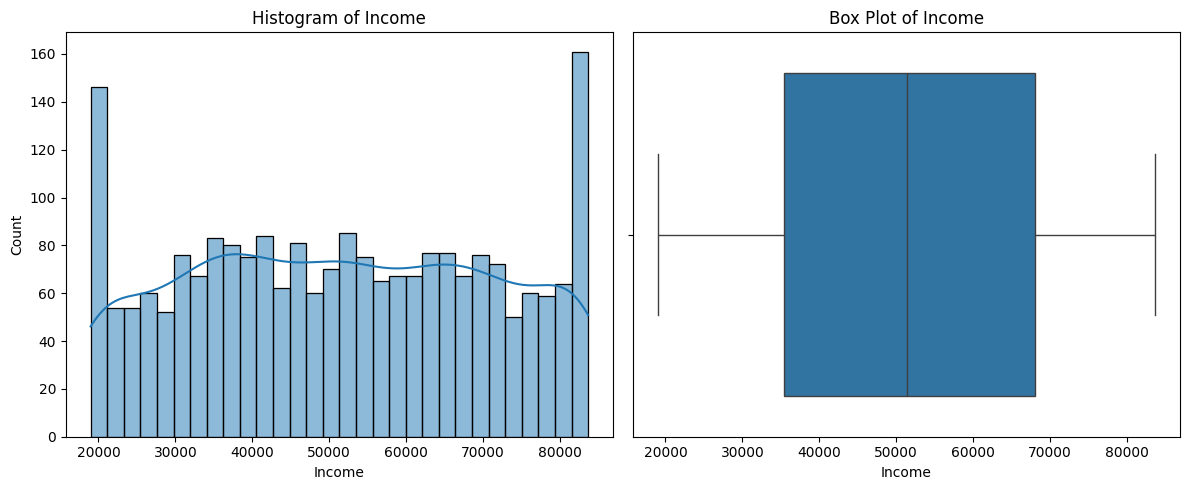

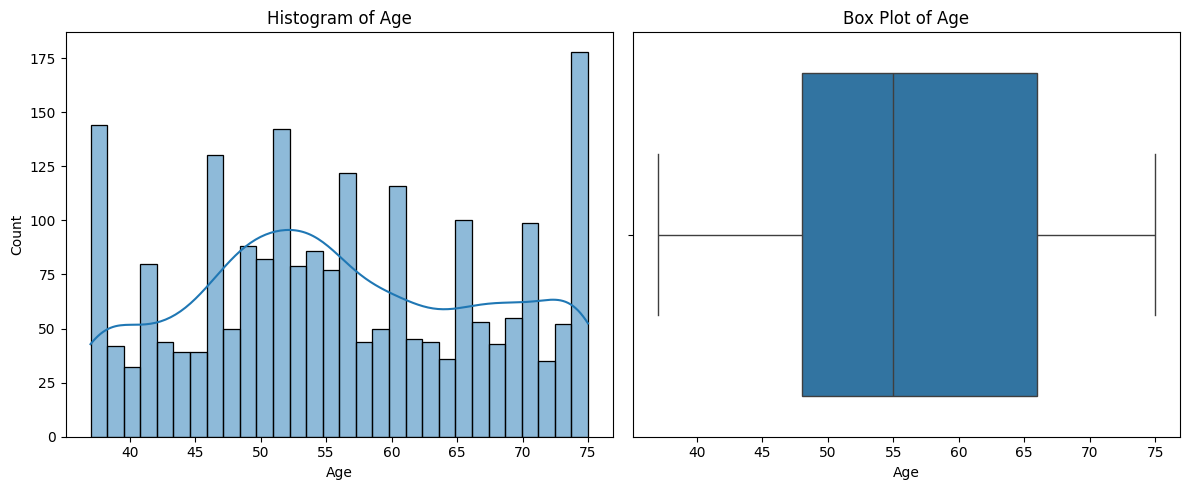

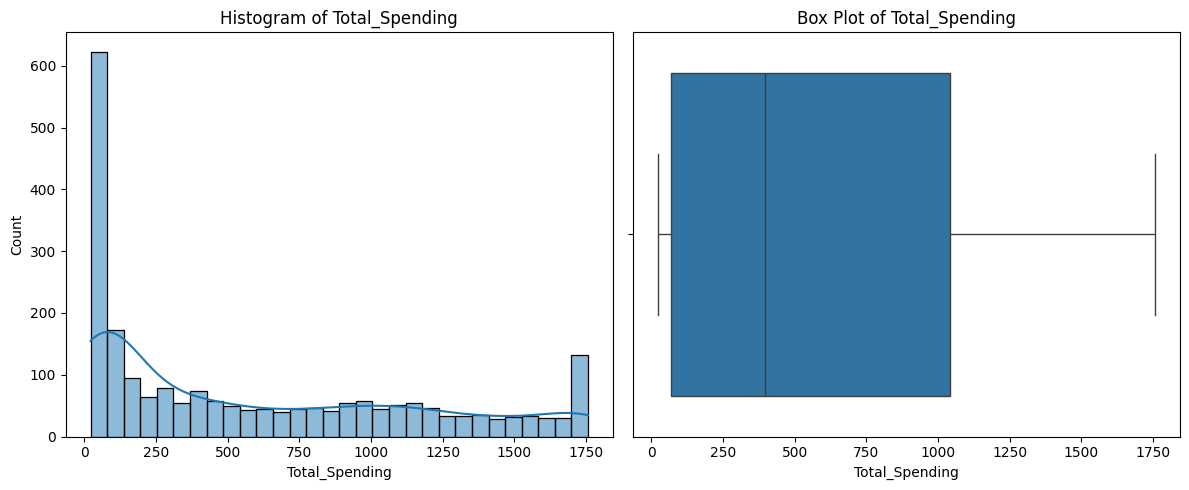

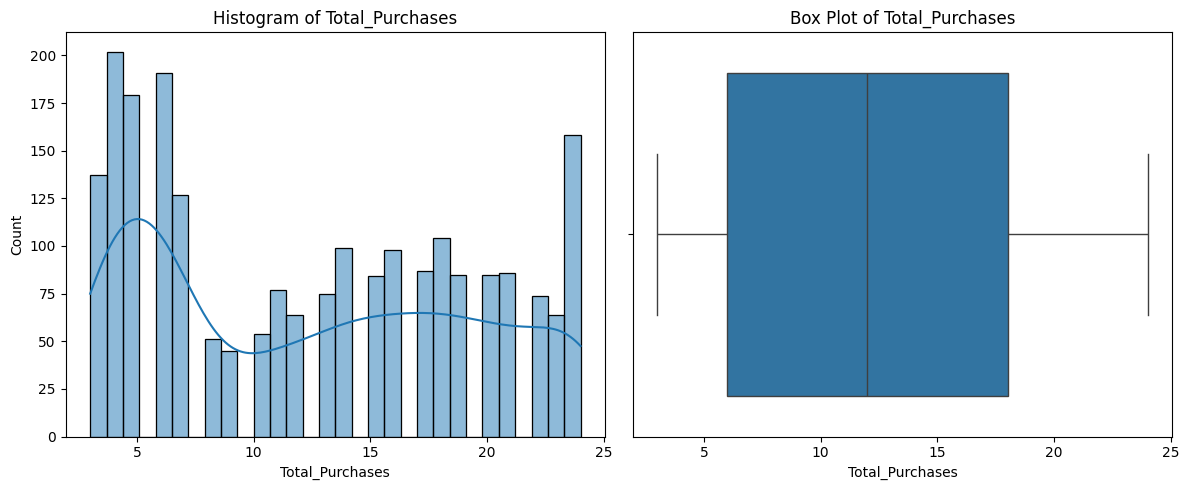

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Handling outliers by IQR
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases']
for col in cols:
    df = treat_outliers_iqr(df, col)
# Handling outliers by winsorizing
# from scipy.stats.mstats import winsorize
# for col in cols:
#     df[col] = winsorize(df[col], limits=[0.05, 0.05])
for col in cols:
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show() 


In [ ]:
%pip install scikit-learn

#### Data Preparation 

0       1
1       1
2       1
3       1
4       1
       ..
2235    3
2236    1
2237    1
2238    1
2239    3
Name: Education_Encod, Length: 2226, dtype: int64
      Education_Encod  Marital_Status_Married  Marital_Status_Single  \
0                   1                   False                  False   
1                   1                   False                   True   
2                   1                    True                  False   
3                   1                   False                  False   
4                   1                   False                   True   
...               ...                     ...                    ...   
2235                3                   False                  False   
2236                1                    True                  False   
2237                1                   False                  False   
2238                1                    True                  False   
2239                3                    True   

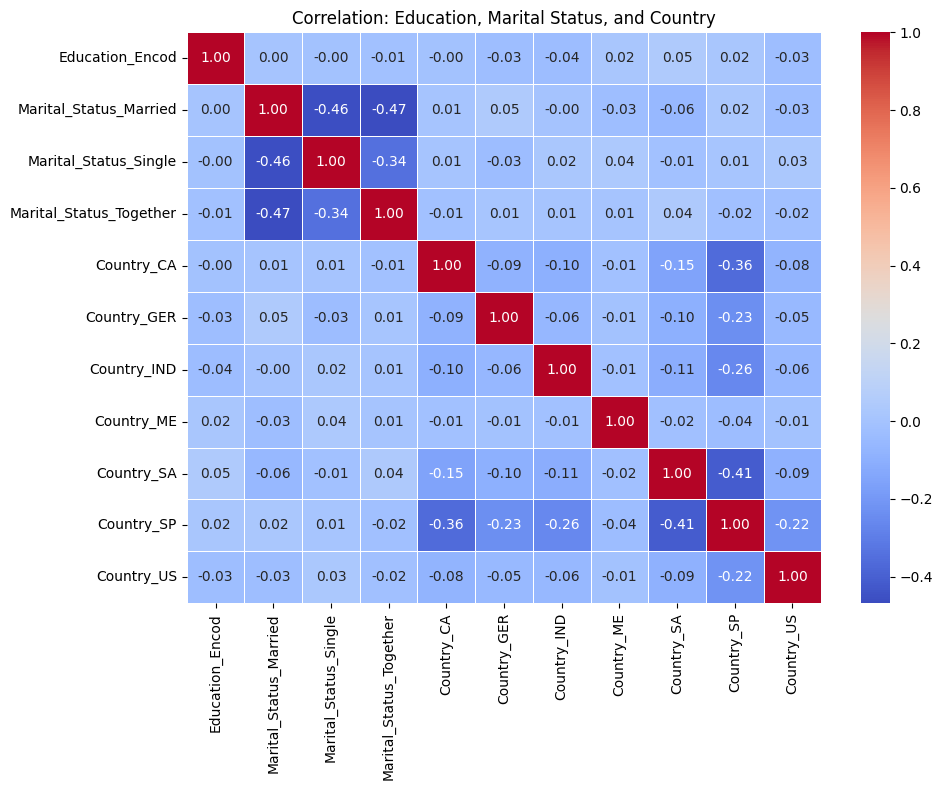

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Ordinal encoding for 'Education'
label_encoder = LabelEncoder()
df['Education_Encod'] = label_encoder.fit_transform(df['Education'])
print(df['Education_Encod'])
# One-hot encoding for 'Marital_Status' and 'Country'
df_encoded = pd.get_dummies(df[['Education_Encod', 'Marital_Status', 'Country']], drop_first=True)
print(df_encoded)
# Compute correlation matrix
corr_matrix = df_encoded.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation: Education, Marital Status, and Country")
plt.tight_layout()
plt.show()

#### Testing hypothesis

In [6]:
import scipy.stats as stats
older_web_group=df[df['Age']>=60]['NumWebPurchases']
younger_web_group=df[df['Age']<60]['NumWebPurchases']
print(older_web_group,younger_web_group)
t_stat_web, p_value_web = stats.ttest_ind(older_web_group, younger_web_group, equal_var=False)
print("T-statistic (Web Purchases):", t_stat_web)
print("P-value:", p_value_web)
alpha = 0.05
if p_value_web < alpha:
    print("Result: Statistically significant difference in web purchases between older and younger individuals.")
else:
    print("Result: No statistically significant difference in web purchases between the two age groups.")

1        7
2        3
5        4
6       10
8        6
        ..
2201    10
2202     2
2216     4
2217     4
2227     5
Name: NumWebPurchases, Length: 856, dtype: int64 0       4
3       1
4       3
7       2
11      3
       ..
2235    5
2236    1
2237    6
2238    5
2239    8
Name: NumWebPurchases, Length: 1370, dtype: int64
T-statistic (Web Purchases): 5.797758167762514
P-value: 7.918810798495903e-09
Result: Statistically significant difference in web purchases between older and younger individuals.


In [7]:
df['Has_Children'] = df['Total_Children'] > 0
print(df['Has_Children'])
web_purchases_with_kids = df[df['Has_Children'] == True]['NumWebPurchases']
web_purchases_without_kids = df[df['Has_Children'] == False]['NumWebPurchases']
print(web_purchases_with_kids,web_purchases_without_kids)
t_stat_web, p_value_web = stats.ttest_ind(web_purchases_with_kids, web_purchases_without_kids, equal_var=False)
print("T-statistic (Web Purchases):", t_stat_web)
print("P-value:", p_value_web)
alpha = 0.05
if p_value_web < alpha:
    print("Result: Statistically significant difference - Customers with children make more online purchases on average..")
else:
    print("Result: No statistically significant difference - having children does not significantly affect online shopping frequency")

0       False
1       False
2        True
3        True
4        True
        ...  
2235     True
2236     True
2237     True
2238    False
2239     True
Name: Has_Children, Length: 2226, dtype: bool
2       3
3       1
4       3
7       2
8       6
       ..
2234    9
2235    5
2236    1
2237    6
2239    8
Name: NumWebPurchases, Length: 1596, dtype: int64 0        4
1        7
5        4
6       10
10       5
        ..
2220     6
2226     2
2229     1
2230     1
2238     5
Name: NumWebPurchases, Length: 630, dtype: int64
T-statistic (Web Purchases): -3.6869215865310174
P-value: 0.00023609997153243851
Result: Statistically significant difference - Customers with children make more online purchases on average..


In [10]:
correlation,p_value=stats.pearsonr(df['NumWebPurchases'],df['NumStorePurchases'])
print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)
alpha=0.05
if p_value<=alpha:
    if correlation<0:
        print("Result: Statistically significant negative correlation. Online purchases may be cannibalizing in-store sales.")
    else:
        print("Result: Statistically significant positive correlation. No evidence of cannibalization.")
else:
    print("Result: No statistically significant relationship between Online purchases and in store")

Pearson correlation coefficient: 0.4991537684627939
P-value: 1.3859926786824851e-140
Result: Statistically significant positive correlation. No evidence of cannibalization.


In [11]:
Us_purchase=df[df['Country']=='US']['Total_Purchases']
Other_purchase=df[df['Country']!='US']['Total_Purchases']
t_stat, p_value = stats.ttest_ind(Us_purchase, Other_purchase, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print(Us_purchase.mean())
print(Other_purchase.mean())
if p_value < alpha:
    print("Result: Statistically significant difference — U.S. customers have different total purchase volumes.")
    if Us_purchase.mean() > Other_purchase.mean():
        print("U.S. outperforms the rest of the world in purchase volume.")
    else:
        print("U.S. underperforms compared to the rest of the world.")
else:
    print("Result: No statistically significant difference in purchase volumes between U.S. and other countries.")

T-statistic: 1.2667417917830992
P-value: 0.20772490174808025
13.37037037037037
12.495750708215297
Result: No statistically significant difference in purchase volumes between U.S. and other countries.


#### Data Visualization

  Product  TotalRevenue
0   Wines        676255
2    Meat        365773
5    Gold         98103
3    Fish         83620
4  Sweets         60107
1  Fruits         58319


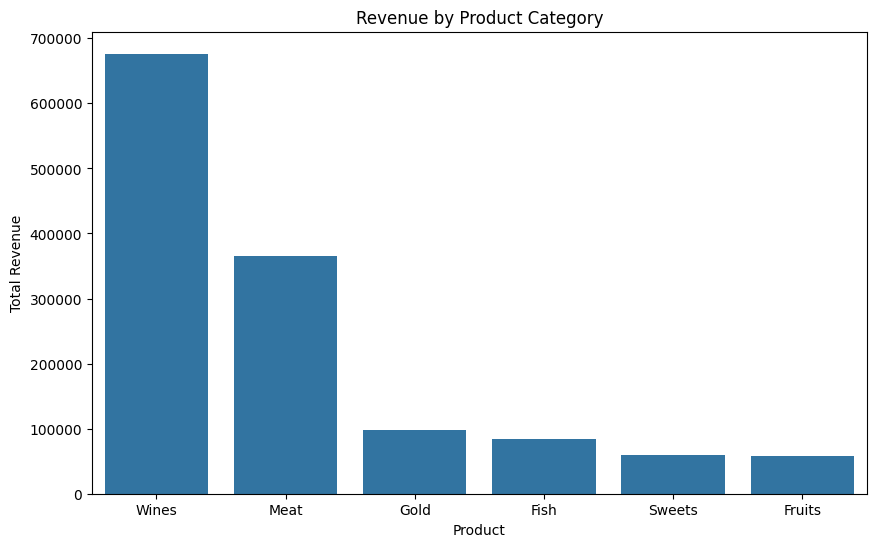

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
product_revenue = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat': df['MntMeatProducts'].sum(),
    'Fish': df['MntFishProducts'].sum(),
    'Sweets': df['MntSweetProducts'].sum(),
    'Gold': df['MntGoldProds'].sum(),
}
revenue_df = pd.DataFrame(product_revenue.items(), columns=['Product', 'TotalRevenue'])
revenue_df = revenue_df.sort_values(by='TotalRevenue', ascending=False)
print(revenue_df)
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_df, x='Product', y='TotalRevenue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product')
plt.show()

              Age  Response
Age       1.00000  -0.01558
Response -0.01558   1.00000


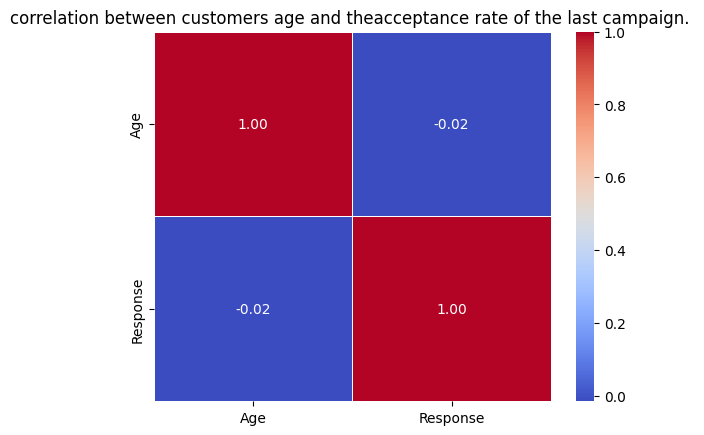

In [13]:
Relationship=df[['Age','Response']]
corr_matrix=Relationship.corr()
print(corr_matrix)
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('correlation between customers age and theacceptance rate of the last campaign. ')
plt.show()

Inference from above Visualization
1: There is no correlation between Age and Response

         Response
Country          
SP            176
SA             51
CA             37
AUS            23
GER            17
IND            13
US             13
ME              2


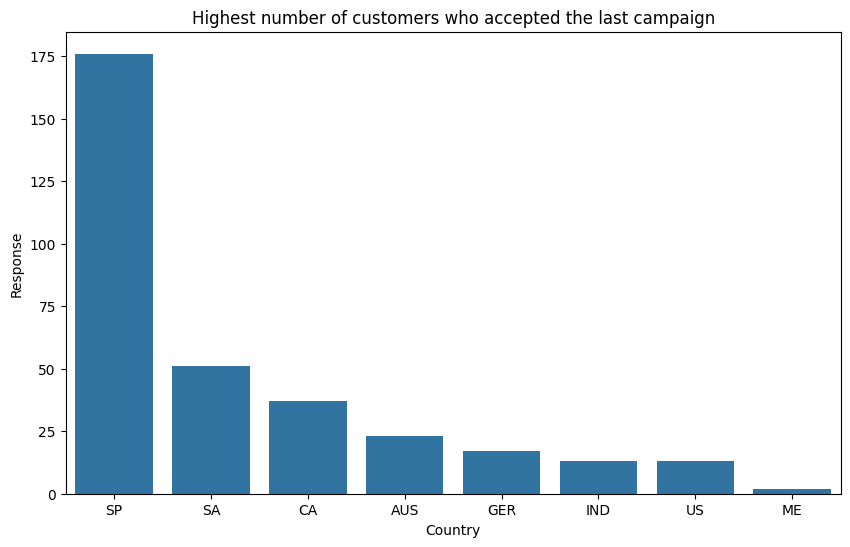

In [14]:
NofCustomer=df.groupby('Country')['Response'].sum()
Highest_customer=pd.DataFrame(NofCustomer,columns=['Response'])
Highest_customer = Highest_customer.sort_values(by='Response', ascending=False)
print(Highest_customer)
plt.figure(figsize=(10, 6))
sns.barplot(data=Highest_customer, x='Country', y='Response')
plt.title('Highest number of customers who accepted the last campaign')
plt.ylabel('Response')
plt.xlabel('Country')
plt.show()

                Total_Spending
Total_Children                
0                       692759
1                       531427
2                       103437
3                        14554


C:\Users\karan\AppData\Local\Temp\ipykernel_16776\1756766859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Total_Children', y='Total_Spending', palette='coolwarm')


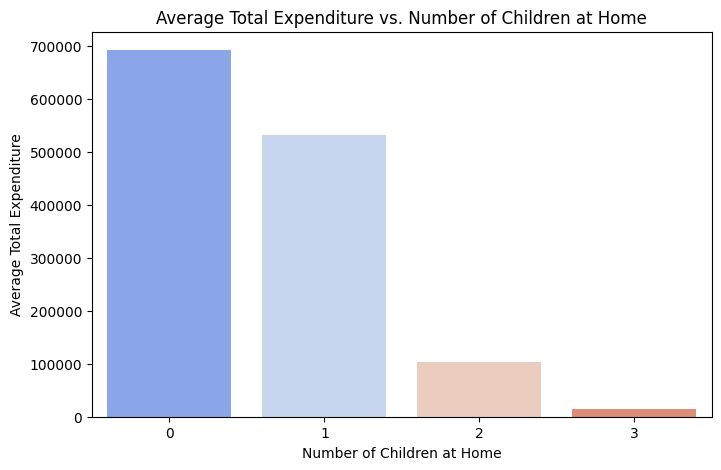

In [47]:
grouped=df.groupby('Total_Children')['Total_Spending'].sum()
grouped=pd.DataFrame(grouped,columns=['Total_Spending'])
print(grouped)
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Total_Children', y='Total_Spending', palette='coolwarm')
plt.title('Average Total Expenditure vs. Number of Children at Home')
plt.xlabel('Number of Children at Home')
plt.ylabel('Average Total Expenditure')
plt.show()

            Complain
Education           
Graduation        17
Master             2
PhD                1
Basic              0


C:\Users\karan\AppData\Local\Temp\ipykernel_15252\2160802928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complaint, x='Education', y='Complain', palette='coolwarm')


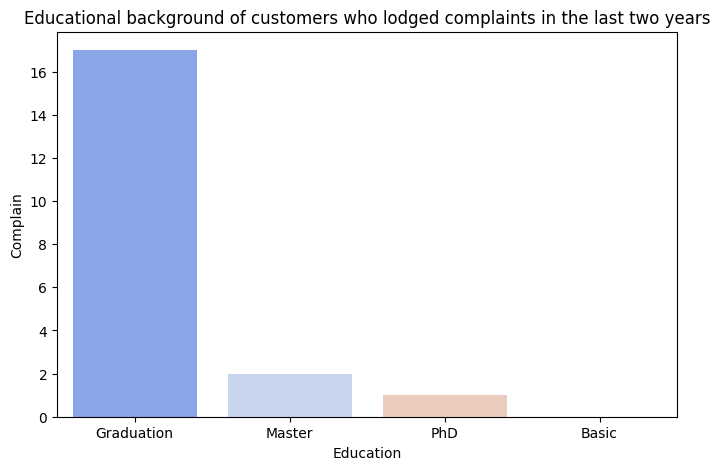

In [15]:
complaint=df.groupby('Education')['Complain'].sum()
complaint=pd.DataFrame(complaint)
complaint = complaint.sort_values(by='Complain', ascending=False)
print(complaint)
plt.figure(figsize=(8, 5))
sns.barplot(data=complaint, x='Education', y='Complain', palette='coolwarm')
plt.title('Educational background of customers who lodged complaints in the last two years')
plt.xlabel('Education')
plt.ylabel('Complain')
plt.show()